<a href="https://colab.research.google.com/github/nickbohall/Automatic_Watermarking_App/blob/main/NFL_Spread_Model_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Housekeeping

In [ ]:
!pip install --upgrade pip setuptools==57.5.0 
!pip install regressors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from functools import reduce
from datetime import datetime as dt
import statsmodels.api as sm
from regressors import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12,8)
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 50)

<ipython-input-24-0ae081f986c8>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Let's get some damn data. 

This is from a python API. All of the API work and data manipulation was done in PyCharm and can be found on Github

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NFL Model/Data/Model Data/final_data.csv", index_col=0)
schedule = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NFL Model/Data/API Data/schedule_2002_to_2022.csv", index_col=0)
df

,score_diff,ewma_dynamic_window_rushing_offense_home,ewma_dynamic_window_passing_offense_home,ewma_dynamic_window_rushing_defense_home,ewma_dynamic_window_passing_defense_home,ewma_dynamic_window_rushing_offense_away,ewma_dynamic_window_passing_offense_away,...,total_score,rest differential,windy,div_game,spread_line,total_line,home_game
0,8,NaN,NaN,NaN,NaN,NaN,NaN,...,54,0,0,0,6.00,44.50,1
1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,71,0,0,0,7.00,42.50,1
2,3,NaN,NaN,NaN,NaN,NaN,NaN,...,17,0,0,0,0.00,33.00,1
3,9,NaN,NaN,NaN,NaN,NaN,NaN,...,29,0,0,0,-8.50,33.50,1
4,28,NaN,NaN,NaN,NaN,NaN,NaN,...,70,0,0,0,9.50,35.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,12,0.10,0.12,-0.10,-0.04,-0.11,-0.04,...,58,-1,0,1,8.00,44.00,1
5627,6,0.05,0.04,-0.01,-0.08,0.04,-0.04,...,38,0,0,1,16.50,42.50,1
5628,5,-0.04,0.05,-0.05,-0.01,-0.09,-0.14,...,17,0,0,1,3.50,37.50,1
5629,13,-0.01,-0.07,-0.04,0.15,-0.18,0.07,...,47,0,0,1,6.00,40.50,1


Ok lets define the target and features and create a train test split

In [ ]:
df.dropna(inplace=True)
target = df.score_diff
features = df.drop(['score_diff', 'spread_line', 'total_line', 'total_score', 'windy', 'div_game'], axis=1)

# Creating train test split. Test will be 20% of the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
print(X_train.shape, y_train.shape)

(4312, 10) (4312,)


Lets define a linear regression object and fit our X and Y

In [ ]:
# Create Regression object and fit
clf = LinearRegression()
clf.fit(X_train, y_train)

# Make a prediction based on the fit. Use X_test (20% of the data)
y_pred = clf.predict(X_test)

In [ ]:
# Get some info about the coefficients and how they're impacting the model
mod = sm.OLS(y_train,X_train)
fii = mod.fit()

# Getting some info for graphing later
r2 = fii.rsquared
mse = mean_squared_error(y_pred, y_test)

fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             score_diff   R-squared (uncentered):                   0.146
Model:                            OLS   Adj. R-squared (uncentered):              0.144
Method:                 Least Squares   F-statistic:                              73.68
Date:                Fri, 19 May 2023   Prob (F-statistic):                   8.70e-140
Time:                        21:58:50   Log-Likelihood:                         -17399.
No. Observations:                4312   AIC:                                  3.482e+04
Df Residuals:                    4302   BIC:                                  3.488e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
ewma_dynamic_window_rushing_offense_home    12.8257      2.656      4.829      0.000       7.618      18.033
ewma_dynamic_window_passing_offense_home    21.3331      1.516     14.069      0.000      18.360      24.306
ewma_dynamic_window_rushing_defense_home    -9.4886      2.892     -3.281      0.001     -15.158      -3.819
ewma_dynamic_window_passing_defense_home   -12.2587      1.866     -6.568      0.000     -15.918      -8.599
ewma_dynamic_window_rushing_offense_away   -15.0234      2.752     -5.459      0.000     -20.419      -9.628
ewma_dynamic_window_passing_offense_away   -19.5365      1.519    -12.861      0.000     -22.515     -16.558
ewma_dynamic_window_rushing_defense_away     7.0338      2.845      2.472      0.013       1.456      12.611
ewma_dynamic_window_passing_defense_away     9.0871      1.843      4.932      0.000       5.475      12.700
rest differential                            0.1705      0.084      2.020      0.043       0.005       0.336
home_game                                    1.9945      0.470      4.247      0.000       1.074       2.915
==============================================================================
Omnibus:                       15.083   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.599
Skew:                           0.077   Prob(JB):                     0.000151
Kurtosis:                       3.272   Cond. No.                         35.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Not bad. Lets see what it looks like and we can tweak
Current R^2: 0.142

<ipython-input-29-d3dc932086e1>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(-18, 45, 'MSE =  192.809')

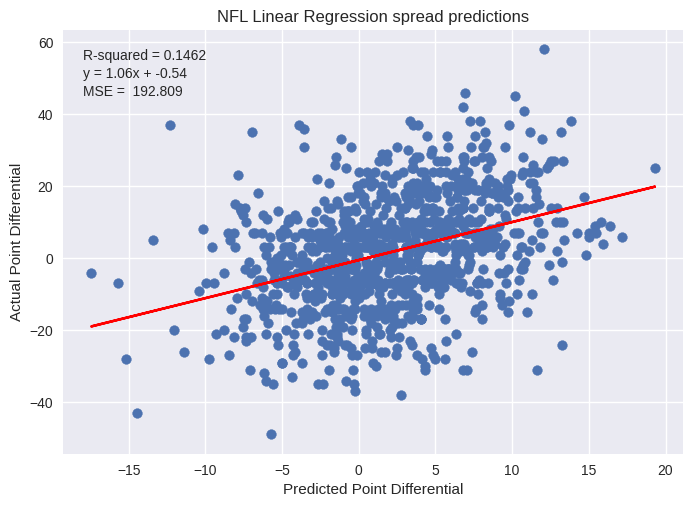

In [ ]:
plt.style.use('seaborn')

# set x and y
x = y_pred
y = y_test

# calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Create the subplot function
fig, ax = plt.subplots()

# Plot the scatter
ax.scatter(x,y)

# Plot the trendline
ax.plot(x, p(x), color="red")

# Titles and axes
plt.title("NFL Linear Regression spread predictions")
plt.xlabel("Predicted Point Differential")
plt.ylabel("Actual Point Differential")

# Plotting some text
plt.text(-18, 55, 'R-squared = %0.4f' % r2)
plt.text(-18, 50, "y = %.2fx + %.2f"%(z[0],z[1]))
plt.text(-18, 45, f"MSE = {mse: .3f}")


Okay lets do the same thing, but instead of our predictions, lets use the vegas closing line. This will give us an idea of how close we are getting to the vegas models

In [ ]:
df.dropna(inplace=True)
target = df.score_diff
features = df.spread_line

# Creating train test split. Test will be 20% of the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

# Have to do a reshape because this is a 1d array now
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
print(X_train.shape, y_train.shape)

(4312, 1) (4312,)


In [ ]:
# Create Regression object and fit
clf = LinearRegression()
clf.fit(X_train, y_train)

# Make a prediction based on the fit. Use X_test (20% of the data)
y_pred = clf.predict(X_test)


In [ ]:
# Get some info about the coefficients and how they're impacting the model
mod = sm.OLS(y_train,X_train)
fii = mod.fit()

# Getting some info for graphing later
r2 = fii.rsquared
mse = mean_squared_error(y_pred, y_test)

fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             score_diff   R-squared (uncentered):                   0.197
Model:                            OLS   Adj. R-squared (uncentered):              0.197
Method:                 Least Squares   F-statistic:                              1061.
Date:                Fri, 19 May 2023   Prob (F-statistic):                   3.15e-208
Time:                        21:58:50   Log-Likelihood:                         -17265.
No. Observations:                4312   AIC:                                  3.453e+04
Df Residuals:                    4311   BIC:                                  3.454e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0273      0.032     32.570      0.000       0.965       1.089
==============================================================================
Omnibus:                       16.878   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.019
Skew:                           0.081   Prob(JB):                     4.50e-05
Kurtosis:                       3.292   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-33-dd83a150ef10>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(-18, 45, 'MSE =  178.339')

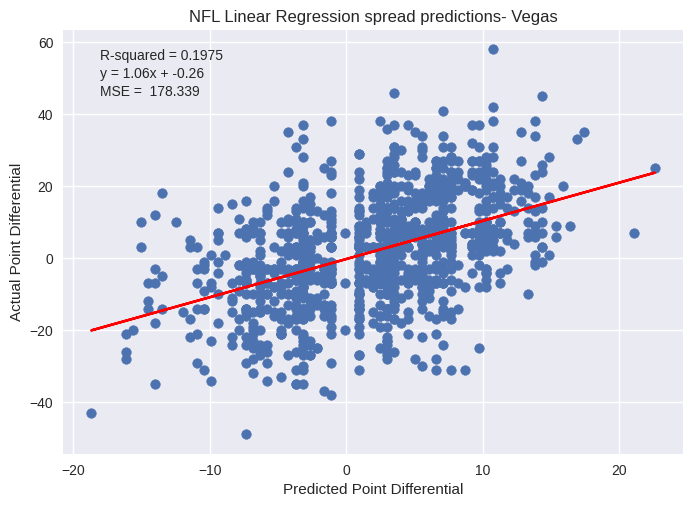

In [ ]:
plt.style.use('seaborn')

# set x and y
x = y_pred
y = y_test

# calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Create the subplot function
fig, ax = plt.subplots()

# Plot the scatter
ax.scatter(x,y)

# Plot the trendline
ax.plot(x, p(x), color="red")

# Titles and axes
plt.title("NFL Linear Regression spread predictions- Vegas")
plt.xlabel("Predicted Point Differential")
plt.ylabel("Actual Point Differential")

# Plotting some text
plt.text(-18, 55, 'R-squared = %0.4f' % r2)
plt.text(-18, 50, "y = %.2fx + %.2f"%(z[0],z[1]))
plt.text(-18, 45, f"MSE = {mse: .3f}")

In [ ]:
pred_y_df = pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred, "model_difference": y_test - y_pred})
pred_y_df

,Actual Value,Predicted Value,model_difference
934,-1,3.01,-4.01
4892,6,4.04,1.96
1475,34,5.59,28.41
3230,2,-4.74,6.74
3041,-14,-3.19,-10.81
...,...,...,...
939,-3,10.23,-13.23
3889,18,2.49,15.51
827,-17,-3.19,-13.81
2973,-4,7.14,-11.14


Ok Let's try Random Forest

In [ ]:
#Random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
df = df.dropna()
target = df['score_diff']
feature_cols = [column for column in df.columns if 'ewma' in column and 'dynamic' in column]
features = df[feature_cols]

In [ ]:
#Data preprocessing
X = features.values
y = df['score_diff'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

RF_model = RandomForestRegressor(n_estimators = 2000)

RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)

print(mean_absolute_error(y_test, y_pred))

<ipython-input-37-598a7d6783df>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train, y_train)


10.270259259259259


In [ ]:
importance = RF_model.feature_importances_

feature_names = feature_cols

d = {'Var_Name': feature_names, 'Imp': importance}
dfRF = pd.DataFrame(data=d)
dfRF = dfRF.sort_values(by = ['Imp'], ascending = False).reset_index(drop = True)
dfRF.head(10)

,Var_Name,Imp
0,ewma_dynamic_window_passing_offense_home,0.16
1,ewma_dynamic_window_passing_offense_away,0.16
2,ewma_dynamic_window_passing_defense_home,0.12
3,ewma_dynamic_window_passing_defense_away,0.12
4,ewma_dynamic_window_rushing_offense_away,0.11
5,ewma_dynamic_window_rushing_offense_home,0.11
6,ewma_dynamic_window_rushing_defense_home,0.11
7,ewma_dynamic_window_rushing_defense_away,0.11


In [ ]:
print(y_train.shape)
print(y_test.shape)

print()

(4851, 1)
(540, 1)



In [ ]:
#LOGISTIC
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

ValueError: ignored

## Fuck it Fast AI Time

In [ ]:
from fastai.tabular.all import *

In [ ]:
print(feature_cols)

In [ ]:
fai_df = pd.merge(target, features, right_index=True, left_index=True)
fai_df.head()

In [ ]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))